# **BE6: Turbojet Ideal Cycle Analysis**
### Supakorn Suttiruang (6031857321) $ M_{\infty} = 1.8 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skaero.atmosphere import coesa

In [256]:
# Parameter summary from Aerothermodynamics of Gas Turbine and Rocket Propulsion by G. C. Oates
def ideal_tjet(M0, gamma, C_p, pi_c, tau_lambda, h, T_a, altitude=1000):
    # Standard atmosphere
    if not T_a: # Undefined free-stream static temperature
        _, T_a, p_a, rho_a = coesa.table(altitude)  # Altitude by default, 1 km
    
    R = ((gamma - 1) / gamma) * C_p # Gas constant of air {J/kg-K}

    # Speed of sound
    a0 = np.sqrt(gamma * R * T_a) # Speed of sound {m/s}

    # Free-stream stagnation temperature
    tau_r = 1 + (((gamma - 1)/2) * (M0**2)) # Free-stream stagnation temperature ratio {-}

    # Compressor stagnation temperature
    tau_c = pi_c ** ((gamma - 1)/gamma) # Compressor stagnation temperature ratio {-}

    # Specific thrust
    F_sp = a0 * ((((((2 * tau_r)/(gamma - 1))*((tau_lambda / (tau_r * tau_c)) - 1)*(tau_c - 1) + ((tau_lambda / (tau_r * tau_c))*M0**2)))**0.5) - M0) # Specific thrust {m/s}

    # Fuel fraction
    f = ((C_p * T_a) / h) * (tau_lambda - (tau_r * tau_c))

    # Specific fuel consumption
    S = f / F_sp # Specific fuel consumption {s/m}
    
    # Maximum thrust turbojet
    tau_c_max_F = np.sqrt(cond['tau_lambda']) / result['tau_r']
    pi_c_max_F = tau_c_max_F ** (gamma / (gamma - 1))
    F_sp_max = a0 * (((((2/(gamma-1))*((np.sqrt(tau_lambda) - 1)**2)) + (M0**2))**0.5) - M0)
    f_max_F = ((C_p * T_a) / h) * np.sqrt(tau_lambda) * (np.sqrt(tau_lambda) - 1)
    S_max_F = f_max_F / F_sp_max # Specific fuel consumption {s/m}
    
    return {
        'R': R,
        'a0': a0,
        'tau_r': tau_r,
        'tau_c': tau_c,
        'F_sp': F_sp,
        'f': f,
        'S': S,
        'tau_c_max_F': tau_c_max_F,
        'pi_c_max_F': pi_c_max_F,
        'F_sp_max': F_sp_max,
        'f_max_F': f_max_F,
        'S_max_F': S_max_F
    }

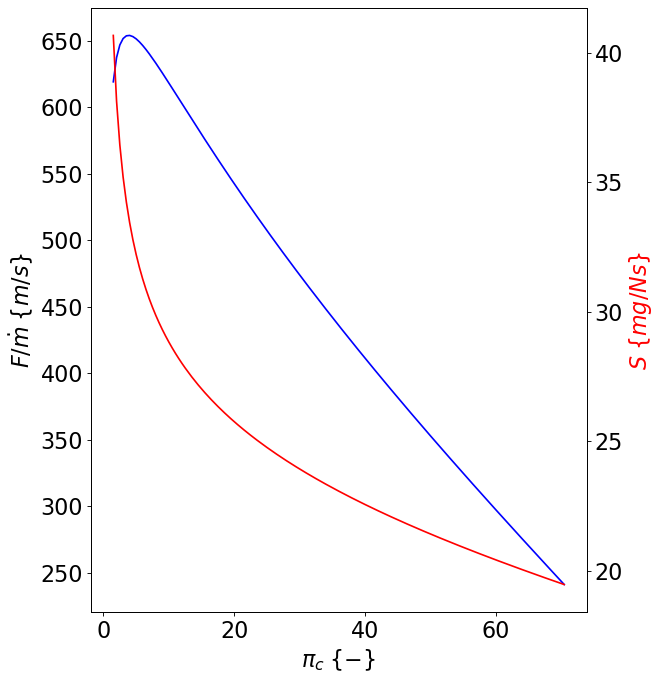

In [245]:
# Example from G. C. Oates pg. 146
# Operating conditions
cond = {
    'gamma': 1.4,
    'M0': 2.0,
    'T_a': 222.2,
    'h': 4.4149e7,
    'C_p': 1004.9,
    'tau_lambda': 7,
    'pi_c': np.arange(1.5, 70+1, 0.5)
}

result = ideal_tjet(**cond)

# Plot
plt.rcParams.update({'font.size': 20})

fig, ax1 = plt.subplots(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel(r'$\pi_c\;\{-\}$')
ax1.set_ylabel(r'$F/\dot{m}\;\{m/s\}$')
ax1.plot(cond['pi_c'], result['F_sp'], color='b')
plt.yticks(np.arange(250, 700, 50))
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$S\;\{mg/Ns\}$', color='r')  # we already handled the x-label with ax1
ax2.plot(cond['pi_c'], result['S']*1e6, color='r')
ax2.tick_params(axis='y')

plt.show()

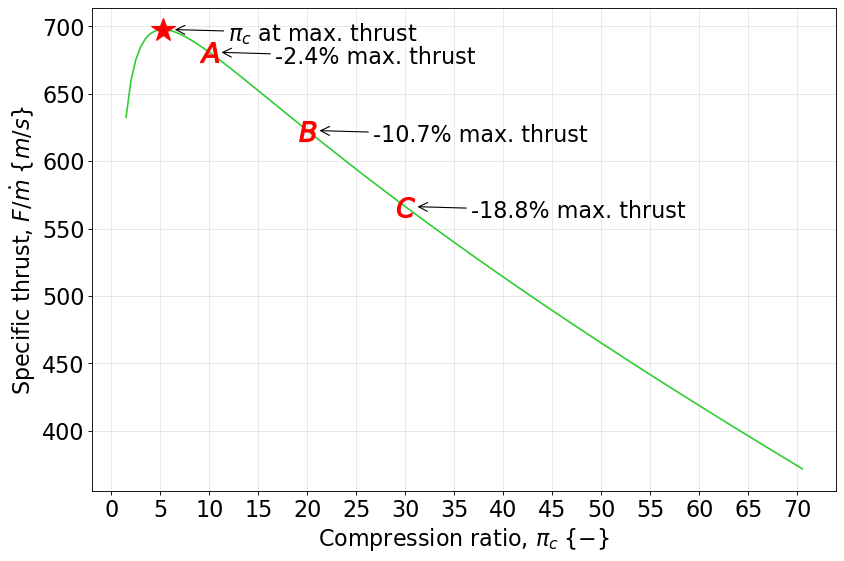

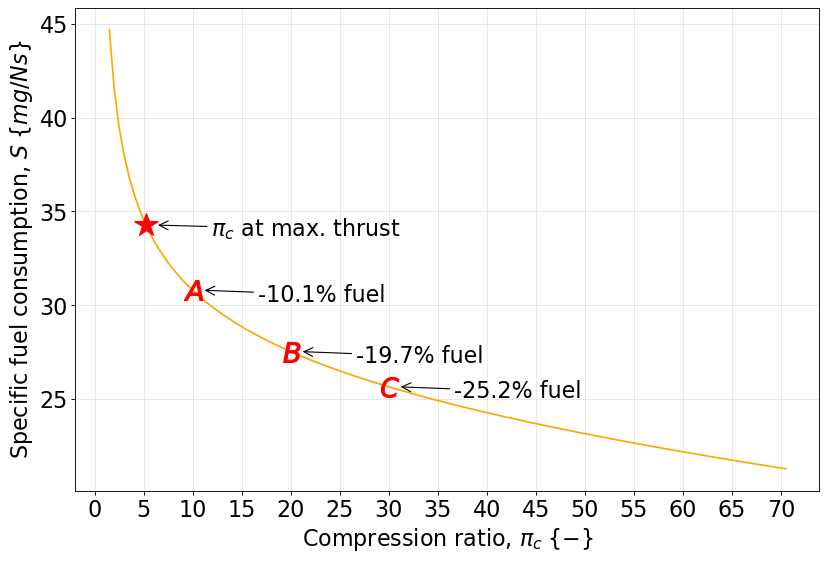

5.242897222745362

In [359]:
# Effect of compression ratio on engine performance
cond = {
    'gamma': 1.4,
    'M0': 1.8,
    'altitude': 9000,
    'T_a': None,
    'h': 4.2e7,
    'C_p': 1004,
    'tau_lambda': 7,
    'pi_c': np.arange(1.5, 70+1, 0.5)
}

result = ideal_tjet(**cond)

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cond['pi_c'], result['F_sp'], color='limegreen')
plt.grid(alpha=0.3)
plt.xlabel(r'Compression ratio, $\pi_c\;\{-\}$')
plt.ylabel(r'Specific thrust, $F/\dot{m}\;\{m/s\}$')
plt.xticks(np.arange(0, 70+1, 5))
plt.yticks(np.arange(250, 700+1, 50))

# Maximum thrust condition
plt.plot(result['pi_c_max_F'], result['F_sp_max'], '*', markersize=22, color='r')
plt.annotate(r'$\pi_c$ at max. thrust', (result['pi_c_max_F'] + 1, result['F_sp_max']), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')

# Plot point A B C
# Point A: pi_c = 10
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 10)[0][0]], result['F_sp'][np.where(cond['pi_c'] == 10)[0][0]], marker='$A$', markersize=18, color='r')
# Point B: pi_c = 20
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 20)[0][0]], result['F_sp'][np.where(cond['pi_c'] == 20)[0][0]], marker='$B$', markersize=18, color='r')
# Point C: pi_c = 30
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 30)[0][0]], result['F_sp'][np.where(cond['pi_c'] == 30)[0][0]], marker='$C$', markersize=18, color='r')

# Plot reduced thrust of point A B C
# Point A
delta = 100 * (result['F_sp'][np.where(cond['pi_c'] == 10)[0][0]] - result['F_sp_max']) / result['F_sp_max']
plt.annotate(r'{:.1f}% max. thrust'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 10)[0][0]] + 1, result['F_sp'][np.where(cond['pi_c'] == 10)[0][0]]), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')
# Point B
delta = 100 * (result['F_sp'][np.where(cond['pi_c'] == 20)[0][0]] - result['F_sp_max']) / result['F_sp_max']
plt.annotate(r'{:.1f}% max. thrust'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 20)[0][0]] + 1, result['F_sp'][np.where(cond['pi_c'] == 20)[0][0]]), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')
# Point C
delta = 100 * (result['F_sp'][np.where(cond['pi_c'] == 30)[0][0]] - result['F_sp_max']) / result['F_sp_max']
plt.annotate(r'{:.1f}% max. thrust'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 30)[0][0]] + 1, result['F_sp'][np.where(cond['pi_c'] == 30)[0][0]]), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')

plt.show()

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cond['pi_c'], result['S']*1e6, color='orange')
plt.grid(alpha=0.3)
plt.xlabel(r'Compression ratio, $\pi_c\;\{-\}$')
plt.ylabel(r'Specific fuel consumption, $S\;\{mg/Ns\}$')
plt.xticks(np.arange(0, 70+1, 5))
# plt.yticks(np.arange(250, 700+1, 50))
plt.plot(result['pi_c_max_F'], result['S_max_F']*1e6, '*', markersize=22, color='r')
plt.annotate(r'$\pi_c$ at max. thrust', (result['pi_c_max_F']+1, result['S_max_F']*1e6), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')

# Point A: pi_c = 10
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 10)[0][0]], result['S'][np.where(cond['pi_c'] == 10)[0][0]]*1e6, marker='$A$', markersize=18, color='r')
# Point B: pi_c = 20
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 20)[0][0]], result['S'][np.where(cond['pi_c'] == 20)[0][0]]*1e6, marker='$B$', markersize=18, color='r')
# Point C: pi_c = 30
plt.plot(cond['pi_c'][np.where(cond['pi_c'] == 30)[0][0]], result['S'][np.where(cond['pi_c'] == 30)[0][0]]*1e6, marker='$C$', markersize=18, color='r')

# Plot reduced fuel consumption of point A B C
# Point A
delta = 100 * (result['S'][np.where(cond['pi_c'] == 10)[0][0]] - result['S_max_F']) / result['S_max_F']
plt.annotate(r'{:.1f}% fuel'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 10)[0][0]] + 1, result['S'][np.where(cond['pi_c'] == 10)[0][0]]*1e6), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')
# Point B
delta = 100 * (result['S'][np.where(cond['pi_c'] == 20)[0][0]] - result['S_max_F']) / result['S_max_F']
plt.annotate(r'{:.1f}% fuel'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 20)[0][0]] + 1, result['S'][np.where(cond['pi_c'] == 20)[0][0]]*1e6), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')
# Point C
delta = 100 * (result['S'][np.where(cond['pi_c'] == 30)[0][0]] - result['S_max_F']) / result['S_max_F']
plt.annotate(r'{:.1f}% fuel'.format(delta), (cond['pi_c'][np.where(cond['pi_c'] == 30)[0][0]] + 1, result['S'][np.where(cond['pi_c'] == 30)[0][0]]*1e6), arrowprops={'arrowstyle': '->'}, xytext=(50, -10), textcoords='offset points')

plt.show()

result['pi_c_max_F']

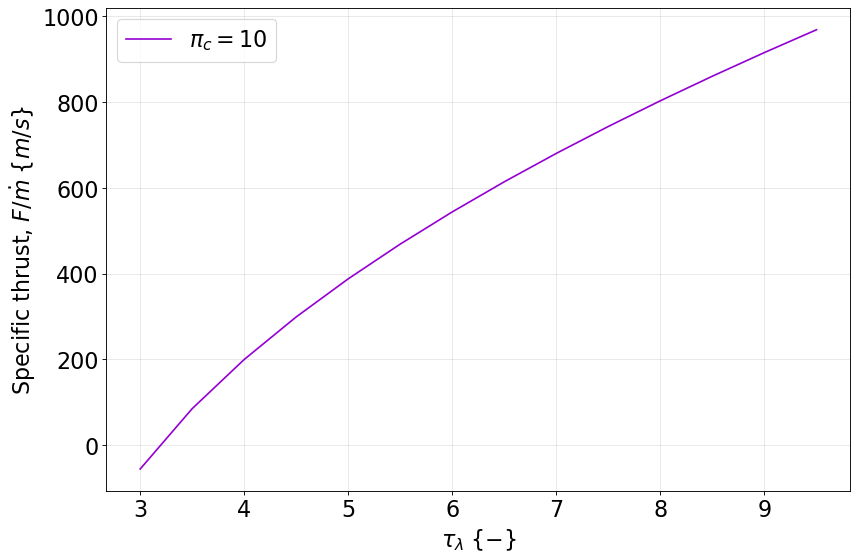

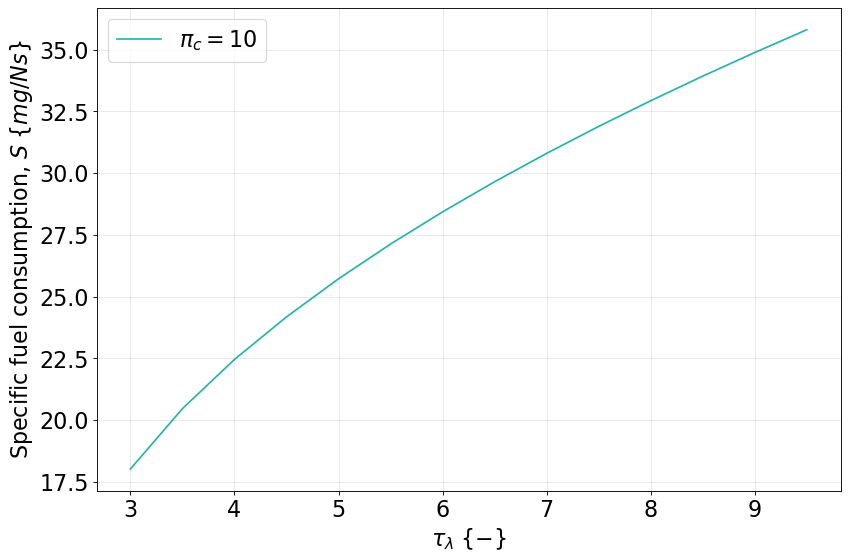

In [362]:
# Effect of turbine inlet temperature
cond = {
    'gamma': 1.4,
    'M0': 1.8,
    'altitude': 9000,
    'T_a': None,
    'h': 4.2e7,
    'C_p': 1004,
    'tau_lambda': np.arange(3, 9+1, 0.5),
    'pi_c': 10
}

result = ideal_tjet(**cond)

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cond['tau_lambda'], result['F_sp'], color='darkviolet', label=r'$\pi_c = 10$')
plt.grid(alpha=0.3)
plt.xlabel(r'$\tau_{\lambda}\;\{-\}$')
plt.ylabel(r'Specific thrust, $F/\dot{m}\;\{m/s\}$')
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cond['tau_lambda'], result['S']*1e6, color='lightseagreen', label=r'$\pi_c = 10$')
plt.grid(alpha=0.3)
plt.xlabel(r'$\tau_{\lambda}\;\{-\}$')
plt.ylabel(r'Specific fuel consumption, $S\;\{mg/Ns\}$')
plt.legend()
plt.show()

In [ ]:
# Off-Design Mach number performance
